In [205]:
'''
Name= G.KAVYASRI
roll = CS20B1126

A) Perform Principle Component Analysis (PCA) for the above data and generate Eigen vectors.
B) Generate Two dimensional and Three dimensional representation of the data.
C) Plot the scatter plots to compares the features after reduction: feature1 vs feature2, feature1 vs
feature3, feature2 v feature3
D) Also perform inverse transformation to get original data and find Mean Square Error as
discussed in class.

'''

import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [206]:
#given data
df=pd.read_csv("pca.csv")
print(df)

    PatternId     x1   x2     x3   x4 
0           1  77.60  136   9.65  12.6
1           2  83.45  177   9.76  13.1
2           3  76.20  164  10.52  13.9
3           4  80.30  185   9.76  12.5
4           5  82.30  187   9.77  13.4
5           6  86.00  171   9.25  13.0
6           7  90.50  211   9.75  12.9
7           8  81.50  158  10.38  13.6
8           9  79.75  176   9.31  12.0
9          10  86.85  175  10.23  14.2
10         11  72.90  139  10.29  12.9
11         12  73.50  124   9.68  12.0
12         13  86.85  149  10.33  13.5
13         14  89.15  224   9.70  13.0
14         15  78.05  149   9.63  12.6
15         16  65.55  166   9.29  11.3
16         17  67.10  132   9.52  11.7
17         18  66.25  173   9.88  12.1
18         19  80.45  155  11.19  13.8
19         20  78.30  202  10.78  13.3
20         21  77.80  155  10.86  14.0
21         22  79.20  161  10.68  14.3
22         23  82.65  158  10.64  12.2
23         24  79.85  156  10.83  13.7
24         25  67.30  157

In [207]:
#A) Perform Principle Component Analysis (PCA) for the above data and generate Eigen vectors.
# drop column 
df=df.drop('PatternId',axis=1)

print(df)

       x1   x2     x3   x4 
0   77.60  136   9.65  12.6
1   83.45  177   9.76  13.1
2   76.20  164  10.52  13.9
3   80.30  185   9.76  12.5
4   82.30  187   9.77  13.4
5   86.00  171   9.25  13.0
6   90.50  211   9.75  12.9
7   81.50  158  10.38  13.6
8   79.75  176   9.31  12.0
9   86.85  175  10.23  14.2
10  72.90  139  10.29  12.9
11  73.50  124   9.68  12.0
12  86.85  149  10.33  13.5
13  89.15  224   9.70  13.0
14  78.05  149   9.63  12.6
15  65.55  166   9.29  11.3
16  67.10  132   9.52  11.7
17  66.25  173   9.88  12.1
18  80.45  155  11.19  13.8
19  78.30  202  10.78  13.3
20  77.80  155  10.86  14.0
21  79.20  161  10.68  14.3
22  82.65  158  10.64  12.2
23  79.85  156  10.83  13.7
24  67.30  157   9.78  11.8
25  70.65  173   9.97  12.2
26  67.15  159   9.99  12.3
27  80.85  160  10.47  12.7
28  81.80  162  10.87  13.9
29  81.15  178  11.07  13.8


In [208]:

#dataframe to numpy
X=df.to_numpy()
print(X)

[[ 77.6  136.     9.65  12.6 ]
 [ 83.45 177.     9.76  13.1 ]
 [ 76.2  164.    10.52  13.9 ]
 [ 80.3  185.     9.76  12.5 ]
 [ 82.3  187.     9.77  13.4 ]
 [ 86.   171.     9.25  13.  ]
 [ 90.5  211.     9.75  12.9 ]
 [ 81.5  158.    10.38  13.6 ]
 [ 79.75 176.     9.31  12.  ]
 [ 86.85 175.    10.23  14.2 ]
 [ 72.9  139.    10.29  12.9 ]
 [ 73.5  124.     9.68  12.  ]
 [ 86.85 149.    10.33  13.5 ]
 [ 89.15 224.     9.7   13.  ]
 [ 78.05 149.     9.63  12.6 ]
 [ 65.55 166.     9.29  11.3 ]
 [ 67.1  132.     9.52  11.7 ]
 [ 66.25 173.     9.88  12.1 ]
 [ 80.45 155.    11.19  13.8 ]
 [ 78.3  202.    10.78  13.3 ]
 [ 77.8  155.    10.86  14.  ]
 [ 79.2  161.    10.68  14.3 ]
 [ 82.65 158.    10.64  12.2 ]
 [ 79.85 156.    10.83  13.7 ]
 [ 67.3  157.     9.78  11.8 ]
 [ 70.65 173.     9.97  12.2 ]
 [ 67.15 159.     9.99  12.3 ]
 [ 80.85 160.    10.47  12.7 ]
 [ 81.8  162.    10.87  13.9 ]
 [ 81.15 178.    11.07  13.8 ]]


In [209]:
#mean for the data
Xmean=np.mean(X,axis=0)
print(Xmean)

[ 78.365      165.73333333  10.12766667  12.94333333]


In [210]:
#covariance 
Cov=np.cov(array.T)
print(Cov)

[[ 4.75479569e+01  7.05248276e+01  7.58398276e-01  3.36915517e+00]
 [ 7.05248276e+01  4.77995402e+02 -7.91678161e-01  2.89471264e+00]
 [ 7.58398276e-01 -7.91678161e-01  3.15128851e-01  3.23552874e-01]
 [ 3.36915517e+00  2.89471264e+00  3.23552874e-01  6.74954023e-01]]


In [211]:
eigval,eigvec=LA.eig(Cov)
#eigen values
print(eigval)

[4.89280087e+02 3.65396440e+01 6.22203694e-01 9.15073250e-02]


In [212]:
#eigen vectors
print(eigvec)
fv1=eigvec
#print(fv1)

[[ 1.57703890e-01  9.83940357e-01 -7.79869693e-02 -3.01477895e-02]
 [ 9.87461161e-01 -1.57669244e-01  7.78021664e-03 -5.77866853e-04]
 [-1.34959505e-03  2.47595703e-02  6.14484812e-01 -7.88538876e-01]
 [ 6.93670265e-03  7.99296361e-02  7.85026061e-01  6.14245243e-01]]


In [213]:
#Dimension reduction to 2
#highest 2 eigen values
fv2=np.array([eigvec[:,0],eigvec[:,1]])
print(fv2)

[[ 0.15770389  0.98746116 -0.0013496   0.0069367 ]
 [ 0.98394036 -0.15766924  0.02475957  0.07992964]]


In [214]:
#Two dimensional Principle Component Analysis (PCA)
#Transformation
print(np.array(X-Xmean))
print("\n")
print(np.array(X-Xmean).T)
print("\n")
Y=np.matmul(fv2,(X-Xmean).T)
print(Y)

[[-7.65000000e-01 -2.97333333e+01 -4.77666667e-01 -3.43333333e-01]
 [ 5.08500000e+00  1.12666667e+01 -3.67666667e-01  1.56666667e-01]
 [-2.16500000e+00 -1.73333333e+00  3.92333333e-01  9.56666667e-01]
 [ 1.93500000e+00  1.92666667e+01 -3.67666667e-01 -4.43333333e-01]
 [ 3.93500000e+00  2.12666667e+01 -3.57666667e-01  4.56666667e-01]
 [ 7.63500000e+00  5.26666667e+00 -8.77666667e-01  5.66666667e-02]
 [ 1.21350000e+01  4.52666667e+01 -3.77666667e-01 -4.33333333e-02]
 [ 3.13500000e+00 -7.73333333e+00  2.52333333e-01  6.56666667e-01]
 [ 1.38500000e+00  1.02666667e+01 -8.17666667e-01 -9.43333333e-01]
 [ 8.48500000e+00  9.26666667e+00  1.02333333e-01  1.25666667e+00]
 [-5.46500000e+00 -2.67333333e+01  1.62333333e-01 -4.33333333e-02]
 [-4.86500000e+00 -4.17333333e+01 -4.47666667e-01 -9.43333333e-01]
 [ 8.48500000e+00 -1.67333333e+01  2.02333333e-01  5.56666667e-01]
 [ 1.07850000e+01  5.82666667e+01 -4.27666667e-01  5.66666667e-02]
 [-3.15000000e-01 -1.67333333e+01 -4.97666667e-01 -3.43333333e

In [215]:
#inverse transformation to get original data 
#recover the original data

dr2=np.matmul(fv2.T,Y).T + Xmean

print(dr2)

[[ 77.54891254 136.0058353   10.26392112  13.05022901]
 [ 83.4247051  177.00333504  10.19154953  13.2842812 ]
 [ 76.29987273 163.9912717   10.08658599  12.78759844]
 [ 80.253597   185.00444334  10.07240609  12.98321651]
 [ 82.31280139 187.00027046  10.11201015  13.13700382]
 [ 85.93305237 171.00844892  10.28403817  13.52048616]
 [ 90.42926744 211.00662332  10.18335979  13.6495482 ]
 [ 81.53198233 157.99721929  10.24531823  13.24252964]
 [ 79.6514009  176.00989978  10.10499103  12.98702925]
 [ 86.89882153 174.99667136  10.28658509  13.57490873]
 [ 72.92291497 138.99780566  10.13569525  12.66138478]
 [ 73.42338355 124.00744396  10.22658439  12.78852488]
 [ 86.83009579 149.00175712  10.42141669  13.72017063]
 [ 89.10313298 224.00472301  10.08285028  13.46765911]
 [ 78.00294501 149.00541398  10.20670148  13.01128722]
 [ 65.48847678 166.00627153   9.81304764  11.90770411]
 [ 67.04505387 132.00574895  10.02944888  12.2299213 ]
 [ 66.26574844 172.99856629   9.79523504  11.92956462]
 [ 80.5230

In [216]:
#Mean Square Error
mse=np.sum((X-dr2)**2)/30
print(mse)


0.6899206517901066


In [217]:
print(eigval) #Take top 3 values for 3 dimensional reduction 

[4.89280087e+02 3.65396440e+01 6.22203694e-01 9.15073250e-02]


In [218]:
#Dimension reduction to 3
fv3=np.array([eigvec[:,0],eigvec[:,1],eigvec[:,2]])
print(fv3)


[[ 0.15770389  0.98746116 -0.0013496   0.0069367 ]
 [ 0.98394036 -0.15766924  0.02475957  0.07992964]
 [-0.07798697  0.00778022  0.61448481  0.78502606]]


In [219]:
#Three dimensional Principle Component Analysis (PCA)
#Transformation


# print(np.array(X-Xmean))
# print("\n")
# print(np.array(X-Xmean).T)
# print("\n")
Y=np.matmul(fv3,(X-Xmean).T)
print(Y)

[[-2.94828923e+01  1.19289030e+01 -2.04692165e+00  1.93276630e+01
   2.16242226e+01  6.40627556e+00  4.66130210e+01 -7.13775006e+00
   1.03509144e+01  1.04971699e+01 -2.72604998e+01 -4.19832147e+01
  -1.51818109e+01  5.92378770e+01 -1.65749034e+01 -1.76792118e+00
  -3.50946953e+01  5.25945277e+00 -1.02654285e+01  3.58032677e+01
  -1.06815111e+01 -4.53363471e+00 -6.96645286e+00 -9.37279745e+00
  -1.03762828e+01  5.95392209e+00 -8.42183110e+00 -5.27169976e+00
  -3.13917454e+00  1.25567329e+01]
 [ 3.89604849e+00  3.23034894e+00 -1.77075749e+00 -1.17837492e+00
   5.46351573e-01  6.66479197e+00  4.79014063e+00  4.36269663e+00
  -3.51625545e-01  6.99064424e+00 -1.16165390e+00  1.70670896e+00
   1.10365698e+01  1.41887596e+00  2.28862629e+00 -1.28033321e+01
  -5.87980370e+00 -1.31397067e+01  3.83860817e+00 -5.73743432e+00
   1.23898149e+00  1.69000470e+00  5.38876404e+00  3.07366830e+00
  -9.61031628e+00 -8.80014782e+00 -1.00280815e+01  3.33808860e+00
   4.06331284e+00  8.98002656e-01]
 [-7.3

In [220]:
#inverse transformation to get original data 
#recover the original data

dr3=np.matmul(fv3.T,Y).T + Xmean

print(dr3)

[[ 77.60621083 136.00011905   9.81244913  12.4734576 ]
 [ 83.45682362 177.00013079   9.93847716  12.9609723 ]
 [ 76.2103868  164.00019909  10.79167488  13.68837442]
 [ 80.29843637 184.99997003   9.71910206  12.53185812]
 [ 82.31301235 187.00024942  10.110348    13.13488036]
 [ 86.01488275 171.00028527   9.63926987  12.69677187]
 [ 90.49635773 210.99993019   9.65473348  12.97420941]
 [ 81.50344696 158.00006607  10.47015779  13.52977012]
 [ 79.7505317  176.00001019   9.32390706  11.98916687]
 [ 86.86296502 175.00024851  10.56911021  13.93584456]
 [ 72.90077126 139.00001478  10.31017283  12.88428605]
 [ 73.49832227 123.99996784   9.6361177   12.03418283]
 [ 86.84807801 148.99996316  10.27972891  13.53915949]
 [ 89.1503987  224.00000764   9.71042822  12.99187677]
 [ 78.05605081 149.00011598   9.78826357  12.47671801]
 [ 65.5511249  166.00002156   9.31942265  11.27708074]
 [ 67.10224798 132.00004309   9.57879774  11.65419854]
 [ 66.25115534 173.00002215   9.91021887  12.07646052]
 [ 80.4389

In [221]:
#Mean Square Error
mse=np.sum((X-dr3)**2)/30
print(mse)


0.08845708085951672


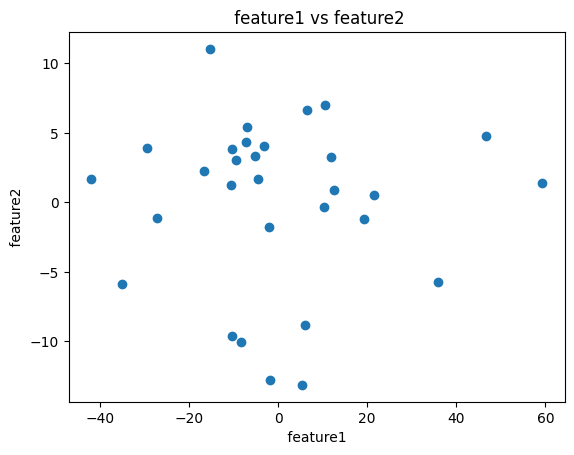

In [222]:
'''
C) Plot the scatter plots to compares the features after reduction: feature1 vs feature2, feature1 vs
feature3, feature2 v feature3
'''
# features=Y.T
# print(features)

plt.scatter(Y[0],Y[1])
# plt.scatter(features[:,0],features[:,1])
plt.title(" feature1 vs feature2")
plt.xlabel(" feature1 ")
plt.ylabel(" feature2 ")
plt.show()

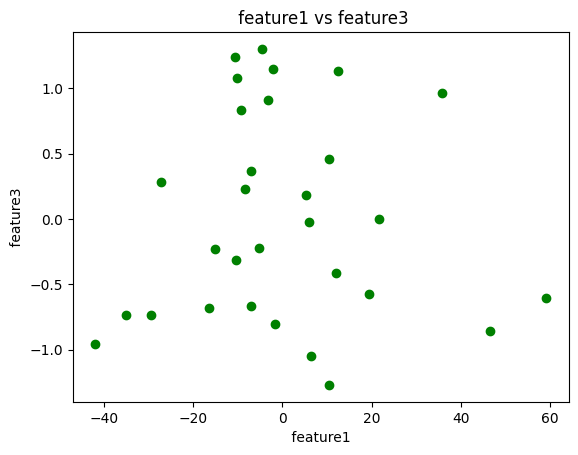

In [223]:
plt.scatter(Y[0],Y[2],color="g")
plt.title(" feature1 vs feature3")
plt.xlabel(" feature1 ")
plt.ylabel(" feature3 ")
plt.show()

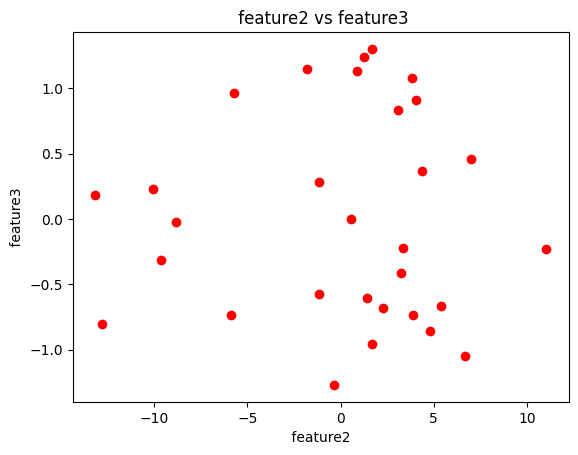

In [224]:
plt.scatter(Y[1],Y[2],color="r")
plt.title(" feature2 vs feature3")
plt.xlabel(" feature2 ")
plt.ylabel(" feature3 ")
plt.show()

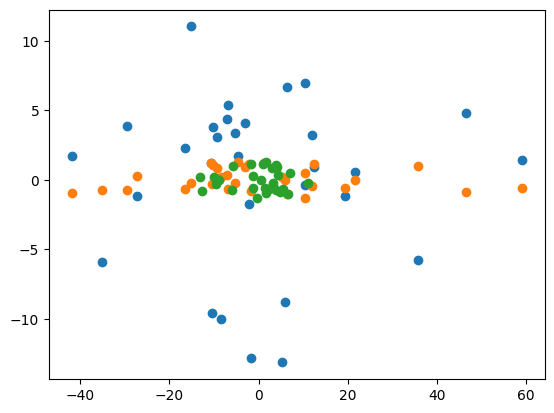

In [225]:
# plt.scatter(Y[0],Y[1])
# plt.scatter(Y[0],Y[2])
# plt.scatter(Y[1],Y[2])
# plt.show()